# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# save api_keys information:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}&units={units}&appid={weather_api_key}&q="

In [4]:
# Performing a weather check on city using a series of API calls:

# Setting list for the loop call:
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []


# Print to logger:
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creating counters for printing log:
record_count = 1
set_count = 1


# Looping through all the cities in our list and performing a request:
for i, city in enumerate(cities):
       
    # Create the endpoint query_url with each city:
    city_url = query_url + city
    
    
    # Grouping cities in sets of 50 for with counters we set for printing log:
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
      
    # Printing records with set numbers and counters:
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Adding 1 to the record count for printing:
    record_count += 1

    # Running the API request for each of the cities 
    # (Using try & except)
    try:
        
        # Make request and store in json
        response = requests.get(city_url).json()
        
        
        city_data.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        
        # Suspension time to prevent api from getting locked
        time.sleep(2)
        
    # Handle exceptions for experienced error, skip the city:
    except:
        # Append null values
        print("City not found. Skipping...")
        pass 
    
# Include a print log of each city as it'sbeing processed (with the city number and city name)              
# Print when data loading is complete: 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | las vigas
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | clyde
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | santiago
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | komsomolskiy
Processing Record 9 of Set 1 | caohai
Processing Record 10 of Set 1 | los chiles
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | ridgecrest
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | mahibadhoo
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | aleksandrov gay
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | alice springs
Processing Record 22 of Set 1 | marawi
Processing Record 23 of Set 1

Processing Record 38 of Set 4 | kharp
Processing Record 39 of Set 4 | hithadhoo
Processing Record 40 of Set 4 | acapulco
Processing Record 41 of Set 4 | micco
Processing Record 42 of Set 4 | bathsheba
Processing Record 43 of Set 4 | husavik
Processing Record 44 of Set 4 | conde
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | brae
Processing Record 47 of Set 4 | pangoa
Processing Record 48 of Set 4 | lagoa
Processing Record 49 of Set 4 | tura
Processing Record 0 of Set 5 | nadym
Processing Record 1 of Set 5 | monrovia
Processing Record 2 of Set 5 | ulcinj
Processing Record 3 of Set 5 | marcona
City not found. Skipping...
Processing Record 4 of Set 5 | chandrakona
Processing Record 5 of Set 5 | lannion
Processing Record 6 of Set 5 | ballina
Processing Record 7 of Set 5 | kadaya
Processing Record 8 of Set 5 | verkhnyaya inta
Processing Record 9 of Set 5 | nemuro
Processing Record 10 of Set 5 | kristianstad
Processing Record 11 of Set 5 | yar-sale
Processing Recor

Processing Record 29 of Set 8 | traverse city
Processing Record 30 of Set 8 | krasnyy klyuch
Processing Record 31 of Set 8 | brooks
Processing Record 32 of Set 8 | keningau
Processing Record 33 of Set 8 | ulagan
Processing Record 34 of Set 8 | filadelfia
Processing Record 35 of Set 8 | insar
Processing Record 36 of Set 8 | kenai
Processing Record 37 of Set 8 | bossangoa
Processing Record 38 of Set 8 | senador guiomard
Processing Record 39 of Set 8 | pangkalanbuun
Processing Record 40 of Set 8 | chagda
City not found. Skipping...
Processing Record 41 of Set 8 | ozinki
Processing Record 42 of Set 8 | brewster
Processing Record 43 of Set 8 | lensk
Processing Record 44 of Set 8 | hamilton
Processing Record 45 of Set 8 | tete
Processing Record 46 of Set 8 | pangnirtung
Processing Record 47 of Set 8 | zhuhai
Processing Record 48 of Set 8 | heswall
Processing Record 49 of Set 8 | mandla
Processing Record 0 of Set 9 | codrington
Processing Record 1 of Set 9 | mombetsu
Processing Record 2 of Se

Processing Record 14 of Set 12 | blenheim
Processing Record 15 of Set 12 | itupiranga
Processing Record 16 of Set 12 | sept-iles
Processing Record 17 of Set 12 | vikulovo
Processing Record 18 of Set 12 | lima
Processing Record 19 of Set 12 | eureka
Processing Record 20 of Set 12 | nguiu
City not found. Skipping...
Processing Record 21 of Set 12 | gravdal
Processing Record 22 of Set 12 | wattegama
Processing Record 23 of Set 12 | qasigiannguit
Processing Record 24 of Set 12 | mopti
Processing Record 25 of Set 12 | taoudenni
Processing Record 26 of Set 12 | boone
Processing Record 27 of Set 12 | bertoua
Processing Record 28 of Set 12 | itarema
Processing Record 29 of Set 12 | xuanhua
Processing Record 30 of Set 12 | cap malheureux
Processing Record 31 of Set 12 | isangel
Processing Record 32 of Set 12 | babanusah
City not found. Skipping...
Processing Record 33 of Set 12 | kawhia
Processing Record 34 of Set 12 | thinadhoo
Processing Record 35 of Set 12 | shenjiamen
Processing Record 36 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating new dataframe for cities data:
city_data_df ={
    "City": city_data, 
    "Lat": city_lat, 
    "Lng": city_lng, 
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
     "Date": city_date}

weather_df = pd.DataFrame(city_data_df)
weather_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [6]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.48,-151.75,79.23,77,97,11.81,PF,1603589829
1,Las Vigas de Ramírez,19.63,-97.08,49.57,100,49,3.71,MX,1603590003
2,Ilulissat,69.22,-51.10,19.40,57,5,13.87,GL,1603589846
3,Clyde,41.30,-82.98,44.01,73,68,5.35,US,1603590007
4,Rikitea,-23.12,-134.97,74.89,81,99,20.58,PF,1603589724


In [7]:
# Exporting the city data to .csv file:

weather_df.to_csv("../output_data/city_weather.csv", index=False, header=True)

In [8]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,22.199819,19.516781,57.888137,74.858951,55.801085,8.003146,1.603591e+09
std,33.336669,90.657843,20.736688,19.500418,39.604982,5.772930,3.638228e+02
min,-54.800000,-179.170000,1.400000,3.000000,0.000000,0.340000,1.603590e+09
25%,-5.130000,-59.030000,42.800000,65.000000,14.000000,3.690000,1.603590e+09
50%,26.120000,23.700000,62.600000,80.000000,72.000000,6.780000,1.603591e+09
75%,50.570000,96.130000,76.170000,90.000000,97.000000,11.410000,1.603591e+09
max,78.220000,179.320000,93.200000,100.000000,100.000000,39.480000,1.603591e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.48,-151.75,79.23,77,97,11.81,PF,1603589829
1,Las Vigas de Ramírez,19.63,-97.08,49.57,100,49,3.71,MX,1603590003
2,Ilulissat,69.22,-51.10,19.40,57,5,13.87,GL,1603589846
3,Clyde,41.30,-82.98,44.01,73,68,5.35,US,1603590007
4,Rikitea,-23.12,-134.97,74.89,81,99,20.58,PF,1603589724


In [10]:
# Inspecting the data for cities where the humidity > 100%: 

weather_df.loc[weather_df["Humidity"] >= 100]["Humidity"].count()

11

In [11]:
# Filtered data by humidity:
filtered_df = weather_df.loc[weather_df['Humidity'] < 100]

In [12]:
len(filtered_df)

542

In [13]:
# Checking the weather_df and comparing it to the filtered_df:
len(weather_df)

553

In [14]:
filtered_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,22.394022,20.821827,57.927675,74.348708,55.433579,8.034188,1.603591e+09
std,33.228459,90.945445,20.874508,19.361962,39.669222,5.758480,3.628309e+02
min,-54.800000,-179.170000,1.400000,3.000000,0.000000,0.340000,1.603590e+09
25%,-4.407500,-58.425000,42.800000,64.000000,14.000000,3.712500,1.603590e+09
50%,26.135000,26.185000,62.600000,79.000000,71.000000,6.860000,1.603591e+09
75%,50.617500,97.765000,76.287500,90.000000,96.750000,11.410000,1.603591e+09
max,78.220000,179.320000,93.200000,99.000000,100.000000,39.480000,1.603591e+09


In [15]:
#  Get the indices of cities that have humidity over 100%.
over_100 = weather_df[weather_df.Humidity > 100].index
over_100

Int64Index([], dtype='int64')

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df
for x in over_100:
    clean_city_data = weather_df.drop([x])
clean_city_data    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.48,-151.75,79.23,77,97,11.81,PF,1603589829
1,Las Vigas de Ramírez,19.63,-97.08,49.57,100,49,3.71,MX,1603590003
2,Ilulissat,69.22,-51.10,19.40,57,5,13.87,GL,1603589846
3,Clyde,41.30,-82.98,44.01,73,68,5.35,US,1603590007
4,Rikitea,-23.12,-134.97,74.89,81,99,20.58,PF,1603589724
...,...,...,...,...,...,...,...,...,...
548,Anori,-3.77,-61.64,74.28,98,100,2.15,BR,1603591174
549,Heihe,50.24,127.49,42.80,41,0,15.66,CN,1603591068
550,Lālmohan,22.34,90.74,79.66,81,80,5.82,BD,1603591179
551,Turtas,58.94,69.13,28.33,98,100,10.47,RU,1603591181


In [17]:
# Extract relevant fields from the cleaned dataframe
lat = clean_city_data .Lat
max_temp = clean_city_data ["Max Temp"]
humid = clean_city_data.Humidity
cloud = clean_city_data.Cloudiness
wind = clean_city_data['Wind Speed']

# Export the clean_city_data into a csv:
clean_city_data.to_csv("../output_data/clean_city_data.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

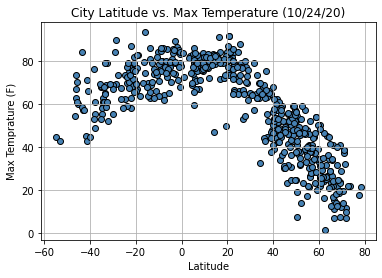

In [18]:
# Plot 1: Latitude vs. Temperature Plot
x_values = lat
y_values = max_temp

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_temp.png")
plt.show()

## Latitude vs. Humidity Plot

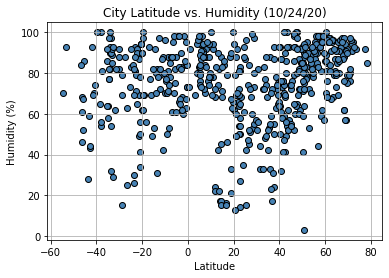

In [19]:
# Plot 2: Latitude vs. Humidity Plot
x_values = lat
y_values = humid

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

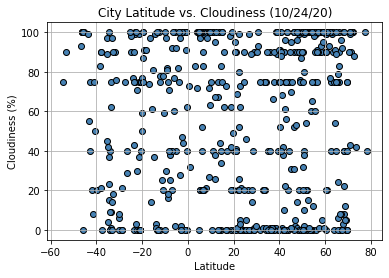

In [20]:
# Plot 3: Latitude vs. Cloudiness Plot
x_values = lat
y_values = cloud

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

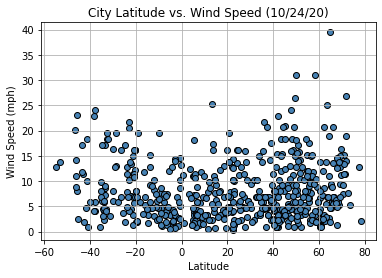

In [21]:
# Plot 4: Latitude vs. Wind Speed Plot
x_values = lat
y_values = wind

plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()
plt.savefig("../Images/lat_vs_wind.png")
plt.show()

## Linear Regression

In [22]:
# Creating northern and southern hemisphere dataframe for linear regression:

north_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 8.964165964988886e-132
The r-value is: -0.8848494263562527


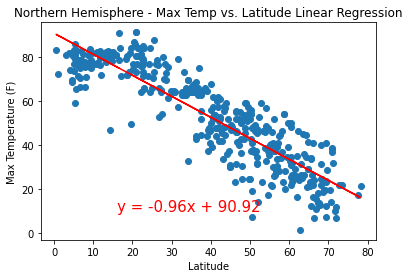

In [23]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression: 
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 1: Northern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_temp_lg.png")
plt.show() 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The p-value is: 1.3114803334368015e-19
The r-value is: 0.6372505359241479


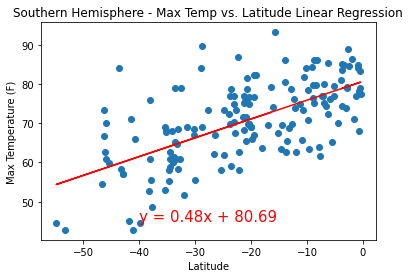

In [24]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 2: Southern Hemisphere - Max Temp vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_temp_lg.png")
plt.show()

## After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

***
## First pair:
### Comparing the linear regression of temperatures at changing latitudes in the northern vs southern hemisphere:

> The linear regression is modeling what happens to temperature as latitudes increase in the northern and southern hemispheres. In addition, this means that for the northern hemisphere as latitude increases you move further away from the equator. On the other hand, in the southern hemisphere latitudes decrease as we move away from the equator. For the northern hemisphere there is a significant negative correlation between latitude and maximum temperature. Whereas, in the southern hemisphere there is a positive correlation between latitude and maximum temperature.  
***

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 2.708198811528567e-07
The r-value is: 0.25589807153215405


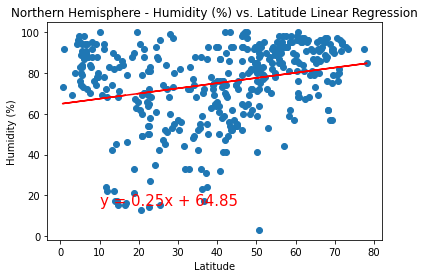

In [25]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 3: Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_humidity_lg.png")
plt.show() 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The p-value is: 0.09459773510601902
The r-value is: 0.13260923486989576


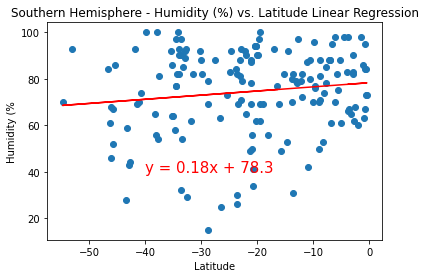

In [26]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 4: Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_humidity_lg.png")
plt.show()

***
## Second pair:
### Comparing the linear regression of humidity at changing latitudes in the northern vs southern hemisphere:

> The linear regression is modeling what happens to humidity as latitude increases in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. 
As latitude increases in the northern hemisphere so does humidity, which means there is a positive correlation. There is no significant correlation between latitudes and humidity in the southern hemisphere. 
***



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 0.16779629336207755
The r-value is: 0.06971484756170356


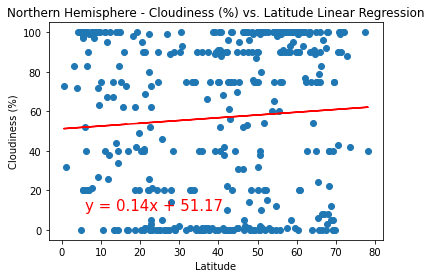

In [27]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 5: Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_cloud_lg.png")
plt.show() 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The p-value is: 0.9044747124062431
The r-value is: 0.009562434574477285


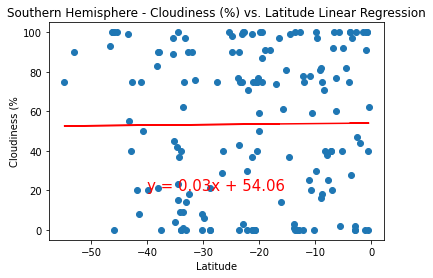

In [28]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression:
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 6: Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_cloud_lg.png")
plt.show()

***
## Third pair:
### Comparing the linear regression of cloudiness at changing latitudes in the northern vs southern hemisphere:
> The linear regression is modeling what happens to cloudiness as latitudes increase in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. For the northern hemisphere, increases in latitude appear to be weakly related to increases in cloudiness, but there is significant positive relationship/correlation. On the other hand, there is no relationship between latitude and cloudiness in the southern hemisphere.
***

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 0.000325798405599106
The r-value is: 0.18037240353064696


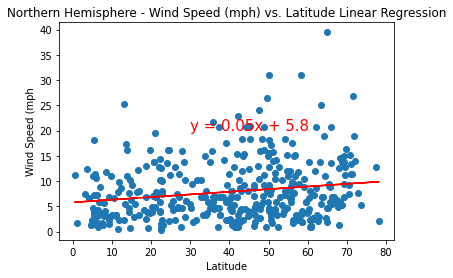

In [29]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression:
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 7: Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/north_wind_lg.png")
plt.show() 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The p-value is: 7.758498326809055e-05
The r-value is: -0.30723126910468695


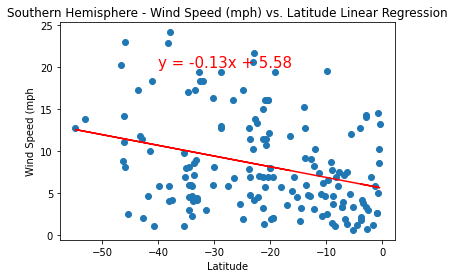

In [30]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression: 
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 8: Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("../Images/south_wind_lg.png")
plt.show() 

***
## Forth pair:
### Comparing the linear regression of wind speed at changing latitudes in the northern vs southern hemisphere:
> The linear regression is modeling what happens to wind speed as latitudes increase in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. In the northern hemisphere, although the relationship between increasing latitude and wind speed is significant (based on the p-value), there only appears to be a weak correlation. On the other hand, in the southern hemisphere there is no correlation between the increasing latitude and wind speed. 
***

## Written description of three observable trends based on the data:
>* For regions that are close to the equator there is a trend of increased temperature for both the northern and southern hemispheres. This is reasonable given the progressive distance from the equator both north and south, respectively.   
>* Across both the northern and southern hemispheres humidity is mostly over 60%, and it trends opposite to temperature, which is accurate given relative humidity increases with decreasing temperature.  
>* For both hemispheres wind speed was generally below 20 miles per hour irrespective of latitude. This appears reasonable given wind speed is determined by pressure differentials across regions and not latitutde. 
>* Cloudiness across both hemispheres was variable and displayed no pattern based on latitude, this is similar to wind speed. 
****